In [ ]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

## Predicting Tip Amounts

Previously, we worked with a dataset that contained one row for each table that a waiter served in a week. Our waiter collected this data in order to predict the tip amount he could expect to receive from a future table.

In [29]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


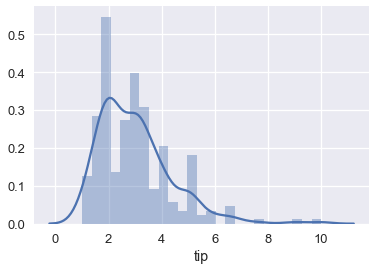

In [31]:
sns.distplot(tips['tip'], bins=25);

As we have covered previously, if we choose a constant model and the mean squared error cost, our model will predict the mean of the tip amount:

In [32]:
np.mean(tips['tip'])

2.9982786885245902

This means that if a new party orders a meal and the waiter asks us how much tip he will likely receive, we will say "around \$3", no matter how large the table is or how much their total bill was.

However, looking at other variables in the dataset, we see that we might be able to make more accurate predictions if we incorporate them into our model. For example, the following plot of the tip amount against the total bill shows a positive association.

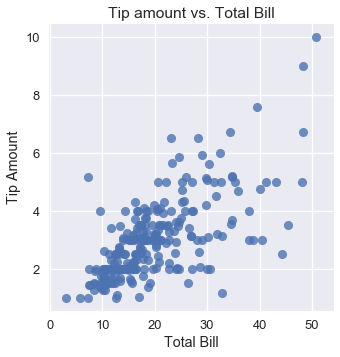

In [39]:
# HIDDEN
sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False)
plt.title('Tip amount vs. Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount');

Although the average tip amount is $\$3$, if a table orders $\$40$ worth of food we would certainly expect that the waiter receives more than $\$3$ of tip. Thus, we would like to alter our model so that it makes predictions based on the variables in our dataset instead of blindly predicting the mean tip amount. To do this, we use a linear model instead of constant one.

Let's briefly review our current toolbox for modeling and estimation and define some new notation so that we can better represent the additional complexity that linear models have.

## Defining a Simple Linear Model

We are interested in predicting the tip amount based on the total bill of a table. Let $ y $ represent the tip amount, the variable we are trying to predict. Let $ x $ represent the total bill, the variable we are incorporating for prediction. 

We define a linear model $ f_\boldsymbol\theta^* $ that depends on $ x $:

$$
f_\boldsymbol\theta^* (x) = \theta_1^* x + \theta_0^*
$$

We treat $ f_\boldsymbol\theta^* (x) $ as the underlying function that generated the data.

$ f_\boldsymbol\theta^* (x) $ assumes that in truth, $ y $ has a perfectly linear relationship with $ x $. However, our observed data do not follow a perfectly straight line because of some random noise $ \epsilon $. Mathematically, we account for this by adding a noise term:

$$
y = f_\boldsymbol\theta^* (x) + \epsilon
$$

If the assumption that $ y $ has a perfectly linear relationship with $ x $ holds, and we are able to somehow find the exact values of $ \theta_1^* $ and $ \theta_0^* $, and we magically have no random noise, we will be able to perfectly predict the amount of tip the waiter will get for all tables, forever. Of course, we cannot completely fulfill any of these criteria in practice. Instead, we will estimate $ \theta_1^* $ and $ \theta_0^* $ using our dataset to make our predictions as accurate as possible.

### Estimating the Linear Model

Since we cannot find $ \theta_1^* $ and $ \theta_0^* $ exactly, we will assume that our dataset approximates our population and use our dataset to estimate these parameters. We denote our estimations with $\theta_1$ and $\theta_0$, our fitted estimations with $ \hat{\theta_1} $ and $ \hat{\theta_0} $, and our model as:

$$
f_\boldsymbol\theta (x) = \theta_1 x + \theta_0
$$

Sometimes you will see $ h(x) $ written instead of $ f_\hat{\boldsymbol\theta} (x) $; the "$ h $" stands for hypothesis, as $ f_\hat{\boldsymbol\theta} (x) $ is our hypothesis of $ f_{\boldsymbol\theta^*} (x) $.

In order to determine $ \hat{\theta_1} $ and $ \hat{\theta_0} $, we choose a cost function and minimize it using gradient descent.